In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficar de manera más llamativa.

In [2]:
import random 
np.random.seed (2013)

In [3]:
from google.colab import files 
uploaded= files.upload ()

Saving wdbc.data to wdbc.data


In [4]:
data=pd.read_csv("wdbc.data")

In [7]:
names=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","ab","cd","ef","gh","ij","kl"]
data=pd.read_csv("wdbc.data",header=None,names=names)

In [8]:
data1=data.select_dtypes(include=["int64", "float64"]) # Nos quedamos solo con los datos numericos. 

In [9]:
data1.head(5) #Mostramos solo las 5 primeras filas de la data.

,a,c,d,e,f,g,h,i,j,k,...,w,x,y,z,ab,cd,ef,gh,ij,kl
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Matrix de correlación o medición de coeficiente de correlación lineal. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


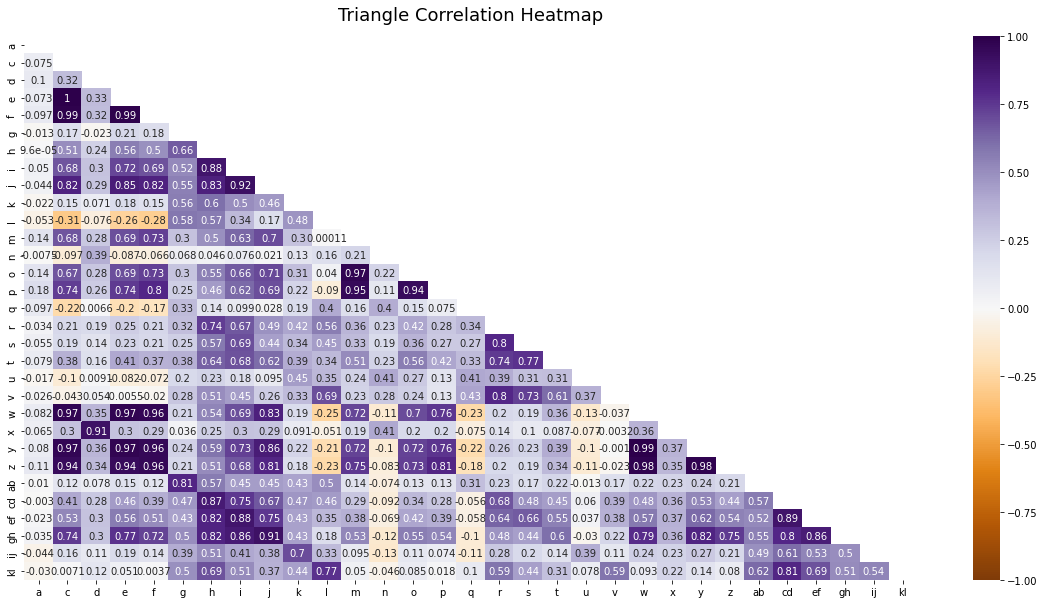

In [13]:
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))
heatmap = sns.heatmap(data1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

**Me indica cuanta correlacion hay entre los Y y las X, los colores morados más oscuros presentan buena relaciones entre variables.  La variable independiente es c-Perímetro y las variables corelacionadas altamente con este son j-dimensión fractal, f-compacidad y e-suavidad.**

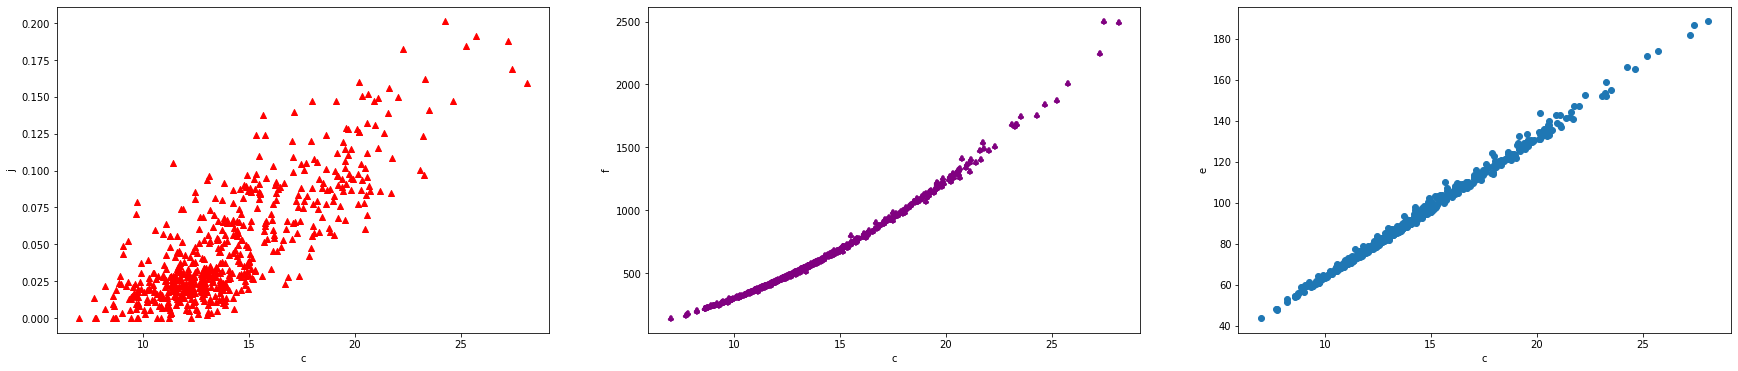

In [41]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data1["c"],data1["j"],marker='^',c="red")
plt.xlabel("c")
plt.ylabel("j")
plt.subplot(132)
plt.scatter(data1["c"],data1["f"],c="purple",marker=r'$\clubsuit$')
plt.xlabel("c")
plt.ylabel("f")
plt.subplot(133)
plt.scatter(data1["c"],data["e"])
plt.xlabel("c")
plt.ylabel("e")
plt.show()

In [42]:
from scipy import optimize
import random

In [57]:
def f( x, p0, p1,p2):
    return p0+p1*x+p2*x**2

def ff(x, p):
    return f(x, *p)

In [68]:
def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

In [79]:
# These are the true parameters
p0,p1,p2 = 1.0, 1.0,1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random(),p2+random.random()]
pfit1, perr1 = fit_leastsq(pstart, data["c"], data["f"], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit1) # Coeficientes calculando la relacion. yo tengo una relacion entre y y x de tanto con un error de tanto
print("perr = ", perr1) # Error de los coeficientes


# Fit parameters and parameter errors from lestsq method :
pfit =  [-10.5164038    0.43684601   3.10992516]
perr =  [8.74880281 1.14249278 0.03576614]


In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(data["f"], f(x0,*pfit1))
print('r2 la puntuación para el modelo perfecto es', r2)

r2 la puntuación para el modelo perfecto es 0.9982500396724502


In [81]:
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, data["c"], data["f"], ff)
print("\n# Fit parameters and parameter errors from bootstrap method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from bootstrap method :
pfit =  [-11.51556261   0.565575     3.10559872]
perr =  [8.53749555 1.13680661 0.03619582]


In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(data["f"], f(x0,*pfit))
print('r2 la puntuación para el modelo perfecto es', r2)

r2 la puntuación para el modelo perfecto es 0.9982499248802128


In [83]:
err_stdev = 0.2
def fit_curvefit(p0, datax, datay, function, yerr=err_stdev, **kwargs):
    """
    Note: As per the current documentation (Scipy V1.1.0), sigma (yerr) must be:
        None or M-length sequence or MxM array, optional
    Therefore, replace:
        err_stdev = 0.2
    With:
        err_stdev = [0.2 for item in xdata]
    Or similar, to create an M-length sequence for this example.
    """
    pfit, pcov = optimize.curve_fit(f,datax,datay,p0=p0, sigma=None, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit 

pfit, perr = fit_curvefit(pstart, data["c"], data["f"], ff)

print("\n# Fit parameters and parameter errors from curve_fit method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from curve_fit method :
pfit =  [-10.5164038    0.43684601   3.10992516]
perr =  [8.74880281 1.14249278 0.03576614]


In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(data["f"], f(x0,*pfit))
print('r2 la puntuación para el modelo perfecto es', r2)

r2 la puntuación para el modelo perfecto es 0.9982500396724502


In [104]:
datos=pd.DataFrame({"A":[-10.5164038,11.51556261,-10.5164038],"B":[0.43684601,0.565575,0.43684601],"C":[3.10992516, 3.10559872,3.10992516 ],"R2":[0.9982499248802128,0.9982499248802128,0.9982500396724502],"CVA":[(-10.5164038/8.748802819)*100, (-11.51556261/8.53749555)*100, (-10.5164038/8.74880281)*100],"CVB":[(0.43684601/1.14249278)*100, (0.565575/1.13680661)*100, (0.43684601/1.14249278)*100],"CVC":[(3.10992516/0.03576614)*100, (3.10559872/0.03619582)*100, (3.10992516/0.03576614)*100]}, index=["optimize.leastsq","bootstrap", "optimize.curve_fit"])

In [105]:
datos

,A,B,C,R2,CVA,CVB,CVC
optimize.leastsq,-10.516404,0.436846,3.109925,0.99825,-120.203918,38.236216,8695.165763
bootstrap,11.515563,0.565575,3.105599,0.99825,-134.882209,49.751206,8579.992717
optimize.curve_fit,-10.516404,0.436846,3.109925,0.99825,-120.203919,38.236216,8695.165763


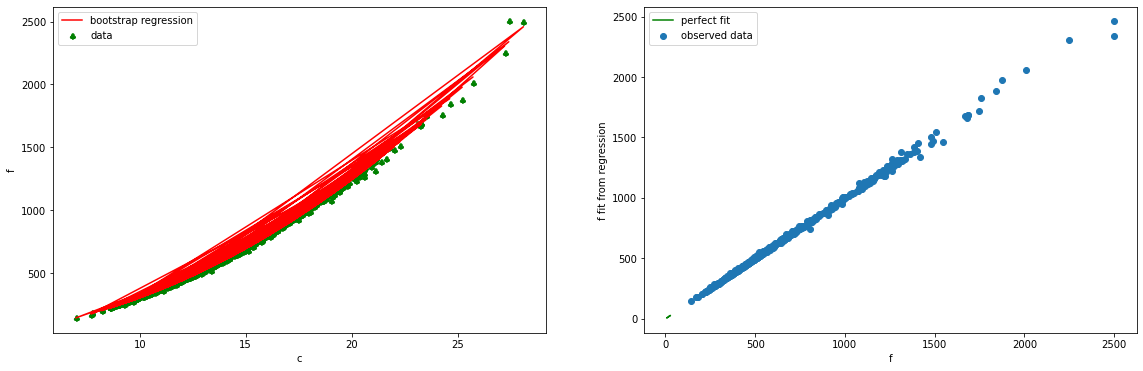

In [107]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data["c"],data["f"],label="data",c="green",marker=r'$\clubsuit$')
x0=data["c"]
plt.plot(x0,f(x0,*pfit),color="r",label="bootstrap regression")
plt.xlabel("c")
plt.ylabel("f")
plt.legend()
plt.subplot(132)
plt.scatter(data["f"],f(x0,*pfit),label="observed data")
plt.plot(x0,x0,color="green",label="perfect fit")
plt.xlabel("f")
plt.ylabel("f fit from regression")
plt.legend()
plt.show()